In [9]:
import pandas as pd


In [14]:
!pip install joblib

In [11]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.3 MB/s eta 0:00:00


0:	learn: 0.6629658	total: 190ms	remaining: 1m 34s
100:	learn: 0.3977719	total: 12.7s	remaining: 50s
200:	learn: 0.3289878	total: 25.4s	remaining: 37.8s
300:	learn: 0.2830993	total: 41.4s	remaining: 27.4s
400:	learn: 0.2532610	total: 54.2s	remaining: 13.4s
499:	learn: 0.2337224	total: 1m 6s	remaining: 0us
Accuracy: 0.920362226024023
Precision: 0.9419766430284976
Recall: 0.8422988072226675
F1 Score: 0.8893534938709476
Specificity: 0.9682032909088283
Log Loss: 0.23607636216641523
Confusion Matrix:
[[67020  2201]
 [ 6690 35732]]


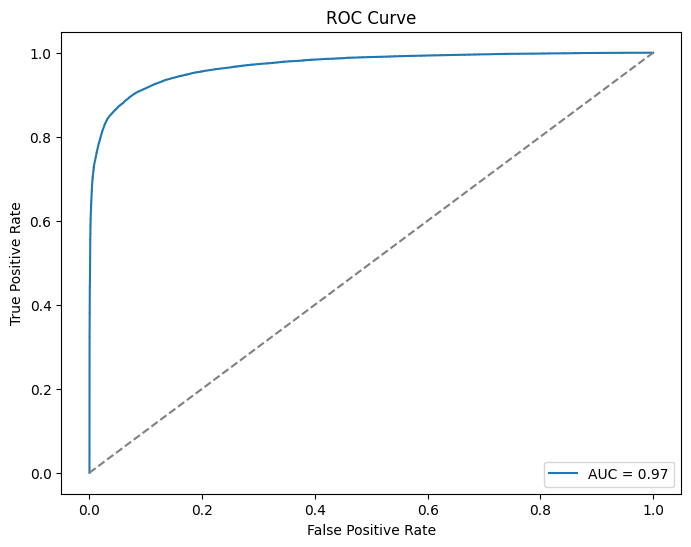

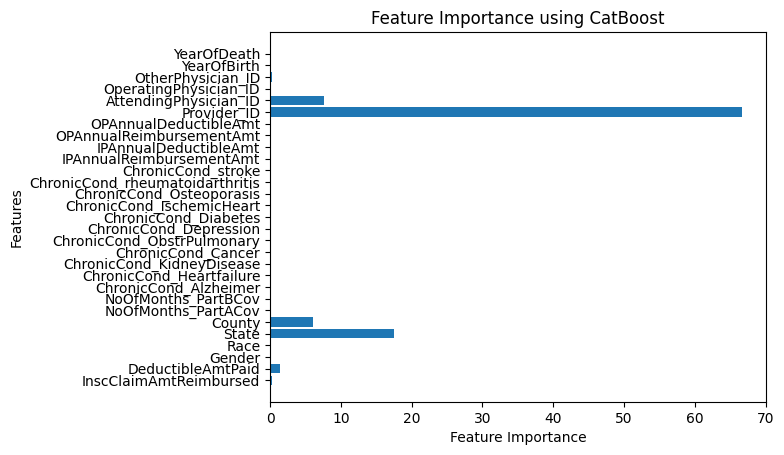

Best Parameters for the final model:
{'iterations': 500, 'learning_rate': 0.1, 'depth': 6, 'random_seed': 42, 'verbose': 100, 'eval_metric': 'Logloss'}


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from catboost import CatBoostClassifier, Pool

data = pd.read_csv("/content/data.csv")

# Convert all elements in the DataFrame to numeric
data = data.apply(pd.to_numeric)

# Split the dataset into features (X) and the target variable (y)
X = data.drop(columns=['PotentialFraud'])  # Features
y = data['PotentialFraud']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CatBoostClassifier with hyperparameters
catboost_model = CatBoostClassifier(
    iterations=500,       # Number of boosting iterations
    learning_rate=0.1,    # Learning rate
    depth=6,              # Depth of the trees
    eval_metric='Logloss',# Evaluation metric
    random_seed=42,       # For reproducibility
    verbose=100           # Print progress every 100 iterations
)

# Train the model
catboost_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = catboost_model.predict(X_test)
y_pred_prob = catboost_model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate specificity (True Negative Rate)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity)

# Calculate log loss
log_loss_value = log_loss(y_test, y_pred_prob)
print("Log Loss:", log_loss_value)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Feature Importance
feature_importances = catboost_model.get_feature_importance()
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance using CatBoost')
plt.show()

# Displaying the best parameters used for the final model
print("Best Parameters for the final model:")
print(catboost_model.get_params())


In [16]:
from joblib import dump

In [17]:
dump(catboost_model, 'catboost_model.joblib')

['catboost_model.joblib']

In [19]:
print(catboost_model)